# Lab 1: Big Data
## Frede Emnetu (100704524)

In [2]:
from apyori import apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import time

## Output function

In [3]:
def output(rules):
    for item in rules:
        for x in item:
            # first index of the inner list
            # Contains base item and add item
            pair = list(x[0])
            items = [x for x in pair]
            print("Rule: " + str(items[0]) + " -> " + str(items[1]))

            #second index of the inner list
            print("Support: " + str(x[1]))

            #third index of the list located at 0th
            #of the third index of the inner list

            print("Confidence: " + str(x[2][0][2]))
            print("Lift: " + str(x[2][0][3]))
            print("=====================================")

## Retail Data Set

In [4]:
# Retail dataset
retail = pd.read_csv("http://fimi.uantwerpen.be/data/retail.dat",delimiter=" ", on_bad_lines='skip',skip_blank_lines=True)
retail_L = retail.values.tolist()
# retail_NN = []

## removing Nan values

In [5]:
retail_NN=[]
for x in retail_L:
    retail_NN.append([i for i in x if str(i) != 'nan'])

## creating sections in data

In [6]:
association = []
sections = [0.002,.005,0.01,0.05,.1]
"""
17632 = 20%
35265 = 40%
52897 = 60%
70530 = 80%
88163 = 100%
"""
for count, x in enumerate(sections):
#     new_list = retail_L[0:int(len(retail_L)*(sections[count]/100))]
    new_list = retail_NN[0:int(len(retail_NN)*(sections[count]))]
    association.append(new_list)

In [8]:
for x in association:
    print(np.shape(x))

(171,)
(427,)
(855,)
(4277,)
(8554,)
(8554,)


/home/friday/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [11]:
pairslen = []
actualpairs = []
times = []
# print(np.shape(association[5]))
for x in range(5):
    start = time.time()
    association_rules = apriori(association[x], min_support=0.01, min_confidence=0.2, min_lift=3, max_length=2)
    association_results = list(association_rules)
    pairslen.append(len(association_results))
    actualpairs.append(association_results)
    end = time.time()
    times.append(end - start)

## Pairs

In [12]:
for x in range(len(sections)): 
    print()
    
    print()
#     print(pairslen[x])
    print('with %g percent of the dataset I got %d pairs.' % (sections[x], pairslen[x]))
    print()
    output(actualpairs)



with 0.002 percent of the dataset I got 44 pairs.

Rule: 18.0 -> 38.0
Support: 0.011695906432748537
Confidence: 1.0
Lift: 3.489795918367347
Rule: 32.0 -> 152.0
Support: 0.011695906432748537
Confidence: 0.5
Lift: 6.107142857142858
Rule: 32.0 -> 178.0
Support: 0.011695906432748537
Confidence: 0.6666666666666666
Lift: 8.142857142857142
Rule: 32.0 -> 396.0
Support: 0.011695906432748537
Confidence: 1.0
Lift: 12.214285714285715
Rule: 36.0 -> 38.0
Support: 0.07017543859649122
Confidence: 1.0
Lift: 3.489795918367347
Rule: 36.0 -> 740.0
Support: 0.011695906432748537
Confidence: 1.0
Lift: 14.25
Rule: 37.0 -> 38.0
Support: 0.03508771929824561
Confidence: 1.0
Lift: 3.489795918367347
Rule: 147.0 -> 37.0
Support: 0.011695906432748537
Confidence: 0.3333333333333333
Lift: 19.0
Rule: 38.0 -> 47.0
Support: 0.023391812865497075
Confidence: 1.0
Lift: 3.489795918367347
Rule: 38.0 -> 55.0
Support: 0.011695906432748537
Confidence: 1.0
Lift: 3.489795918367347
Rule: 56.0 -> 38.0
Support: 0.011695906432748537

Rule: 105.0 -> 38.0
Support: 0.01639344262295082
Confidence: 0.875
Lift: 3.2774122807017543
Rule: 110.0 -> 38.0
Support: 0.03981264637002342
Confidence: 0.9444444444444445
Lift: 3.537524366471735
Rule: 170.0 -> 38.0
Support: 0.06323185011709602
Confidence: 0.23684210526315788
Lift: 3.745614035087719
Rule: 38.0 -> 286.0
Support: 0.01405152224824356
Confidence: 1.0
Lift: 3.745614035087719
Rule: 371.0 -> 38.0
Support: 0.01405152224824356
Confidence: 1.0
Lift: 3.745614035087719
Rule: 36.0 -> 38.0
Support: 0.0456140350877193
Confidence: 0.9285714285714286
Lift: 3.7806122448979593
Rule: 37.0 -> 38.0
Support: 0.021052631578947368
Confidence: 1.0
Lift: 4.071428571428572
Rule: 110.0 -> 38.0
Support: 0.044444444444444446
Confidence: 0.9743589743589743
Lift: 3.967032967032967
Rule: 170.0 -> 38.0
Support: 0.056140350877192984
Confidence: 0.2285714285714286
Lift: 3.988338192419825
Rule: 38.0 -> 286.0
Support: 0.011695906432748537
Confidence: 0.909090909090909
Lift: 3.701298701298701
Rule: 371.0 -> 

## Time vs Section graph

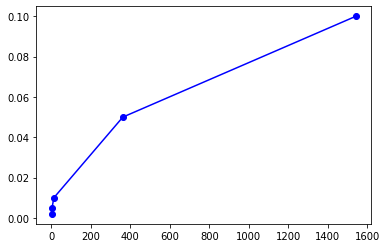

In [13]:
pl.plot(times, [x for x in sections], 'bo-')

## Netflix dataset

In [ ]:
netflix = pd.read_csv('netflix.data',delimiter=" ", on_bad_lines='skip',skip_blank_lines=True)
netflix_L = netflix.values.tolist()

## removing Nan values

In [ ]:
netflix_NN = []
for x in netflix_L:
    netflix_NN.append([i for i in x if str(i) != 'nan'])

In [ ]:
association = []
times = []
sections = [0.002,.005,0.01,0.05,.1]

for count, x in enumerate(sections):
    new_list = netflix_L[0:int(len(netflix_L)*(sections[count]))]
    association.append(new_list)

In [ ]:
pairs = []
times = []
for x in range(5):
    start = time.time()
    association_rules = apriori(association[x], min_support=0.0045, min_confidence=0.2, min_lift=3, max_length=2)
    association_results = list(association_rules)
    pairs.append(len(association_results))
    end = time.time()
    times.append(end - start)

## Pairs

In [ ]:
for x in range(len(sections)): 
    print()
    
    print()
#     print(pairslen[x])
    print('with %g percent of the dataset I got %d pairs.' % (sections[x], pairslen[x]))
    print()
    output(actualpairs)

## Time vs Sections graph

In [ ]:
pl.plot(times, [x for x in sections], 'bo-')

# Conclusions

#### The apyori algorithm is very slow when the data is turned in a list as defined by edureka. I tried using values between 2 and 50 but the algorithm for the retail data took an exceedingly long time for this reason I had to use very low values. As for the netflix data set, it was initially loading but as of finishing this lab I can't load the dataset, otherwise the kernel dies. This occured 5 times and eventually gave up (sry). The netflix dataset produced expected outputs, giving it more data allowed it to create more pairs and of course more rows meant more time spent which produce an approximately log(n) graph with some translation.